UNSW COMP9517
20T2 Lab1
Author:Haowei Lou
zid: z5258575

Import libraries and open image

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Image_path = "cat.png"
Image = cv2.imread(Image_path,0)
Size =Image.shape
Size

(460, 600)

Initialise max/min gray value pixels numpy array and 0, 255 array that smilier to image size Contrast Stretching

In [28]:
def ContrastStretching(Image):
    a = 0
    b = 255
    c = np.min(Image)
    d = np.max(Image)
    O= np.trunc((Image - c)*((b-a)/(d-c))+a)
    return O
O = ContrastStretching(Image)
cv2.imwrite("O.png",O)

True

Before            |  After
:-------------------------:|:-------------------------:
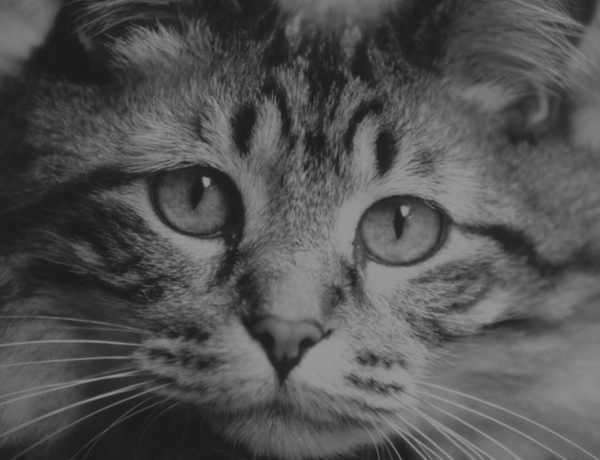  |  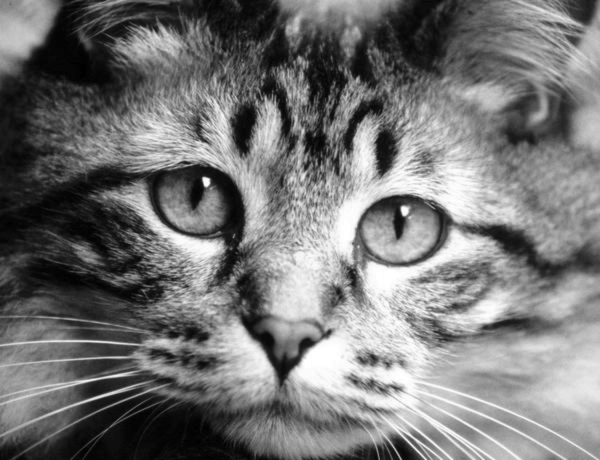 

Calculate intensity histogram of input image

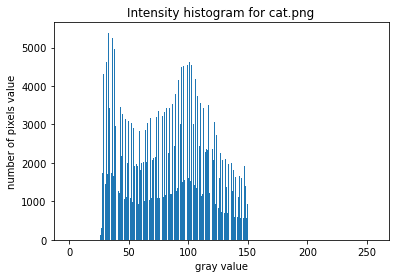

In [29]:
h = [np.count_nonzero(Image == i) for i in range(256)]
plt.bar(range(256),h)
plt.title("Intensity histogram for " + Image_path)
plt.xlabel("gray value")
plt.ylabel("number of pixels value")
plt.show()

Sobel filters

In [30]:
def Sobel(Image):
    Sx = np.array([[-1,0,1],
          [-2,0,2],
          [-1,0,1]])
    Sy = [[-1,-2,-1],
          [0,0,0],
          [1,2,1]]

    Image_zeropadding = np.zeros((Size[0]+2,Size[1]+2))
    Image_zeropadding[1:Size[0]+1,1:Size[1]+1] = Image
    Ox = np.zeros(Size)
    Oy = np.zeros(Size)
    for i in range(Size[0]):
        for j in range(Size[1]):
            Ox[i][j] = np.sum(Image_zeropadding[i:i+3,j:j+3]*Sx)
            Oy[i][j] = np.sum(Image_zeropadding[i:i+3,j:j+3]*Sy)
    return Ox, Oy

Ox,Oy = Sobel(Image)
cv2.imwrite("Ox.png",Ox)
cv2.imwrite("Oy.png",Oy)

sobelx = cv2.Sobel(Image,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(Image,cv2.CV_64F,0,1,ksize=3)
cv2.imwrite("Soblex.png",sobelx)
cv2.imwrite("Sobley.png",sobely)

True

My output            |  Soble output
:-------------------------:|:-------------------------:
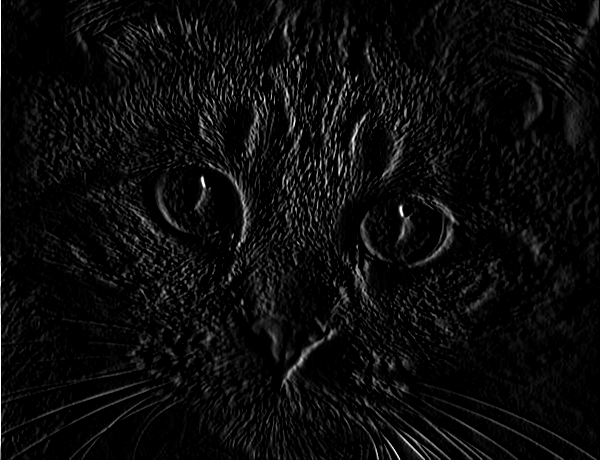|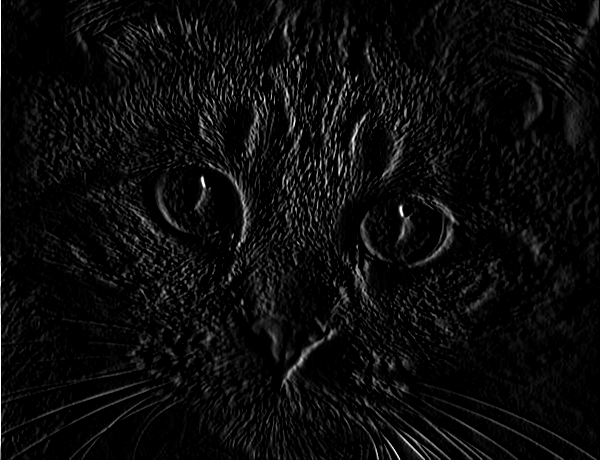
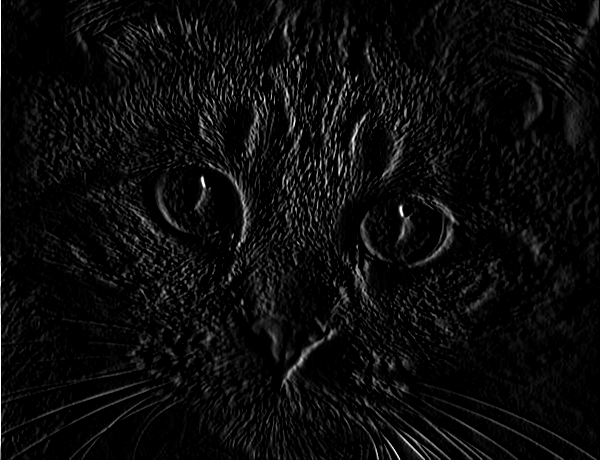|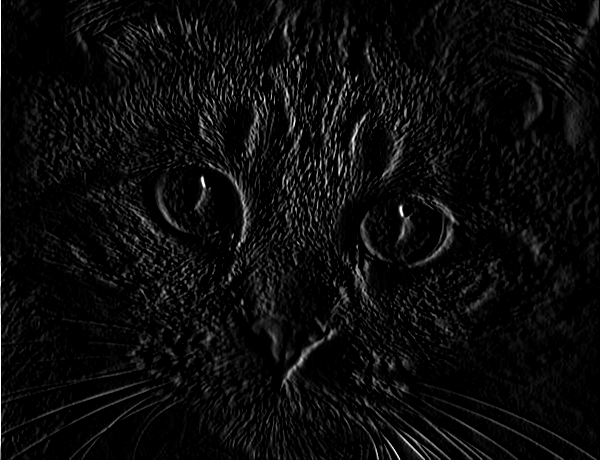

Sharpe image

In [66]:
a = 1.25
sigma = 1
def Sharpe(I):
    L = cv2.GaussianBlur(I,(5,5),sigma).astype("int")
    cv2.imwrite("Blurred.png",ContrastStretching(L))
    H = I - L
    O = I + H*a
    O = ContrastStretching(O)
    return O
O = Sharpe(Image)
cv2.imwrite("Sharped.png",O)

True

Blur             |Unshared           |  Sharped
:--------------------:|:-------------------------:|:-------------------------:
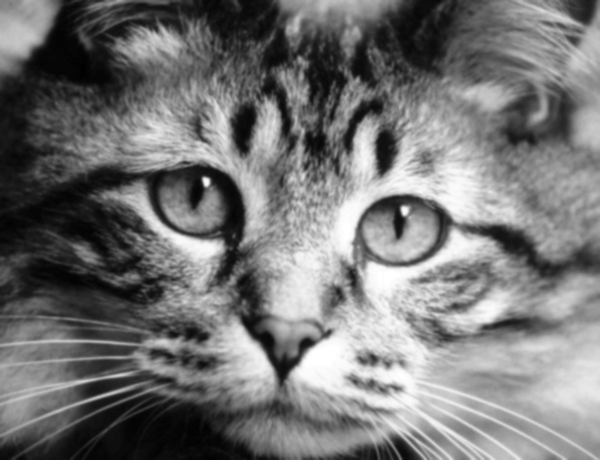|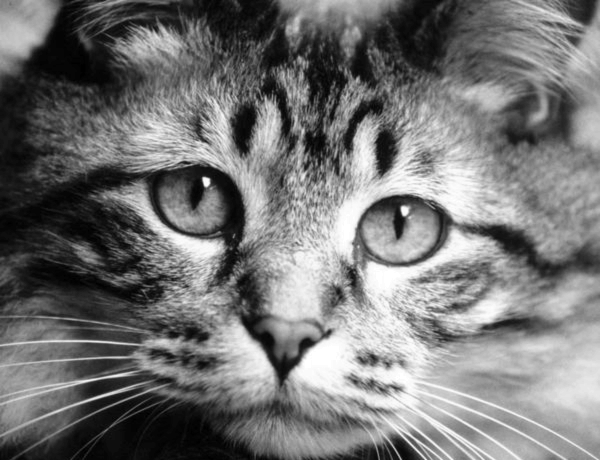|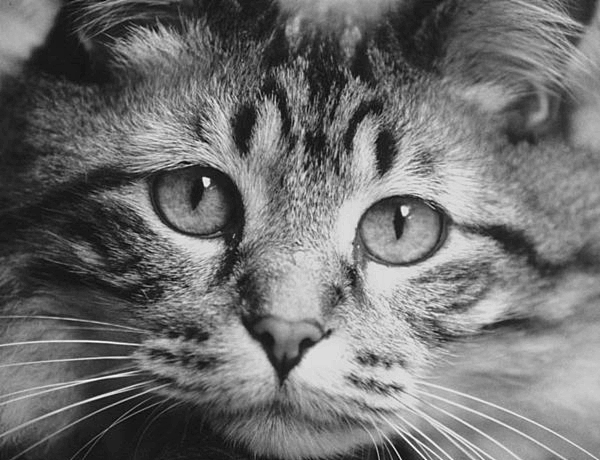